# Introduction to Graph Theory

In [1]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd

## Simple Undirected Network

In [2]:
#Create an Undirected Network
G=nx.Graph()
G.add_edge('A','B')
G.add_edge('B','C')
G.add_edge('C','E')
G.add_edge('E','D')
G.add_edge('C','F')
G.add_edge('F','G')

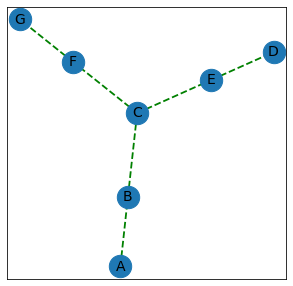

In [3]:
#Make a plot
plt.figure(figsize=(5,5))
pos=nx.spring_layout(G)
nx.draw_networkx_nodes(G, pos, node_size=500)
nx.draw_networkx_edges(G,pos,width=1.8,style='dashed',edge_color='g') #df.prox.values)
nx.draw_networkx_labels(G, pos, font_size=14, font_family="sans-serif",font_color='black')
plt.show()

## Directed Network

In [4]:
#Create a directed Network
G=nx.DiGraph()
G.add_edge('A','B')
G.add_edge('B','C')
G.add_edge('C','E')
G.add_edge('E','D')
G.add_edge('C','F')
G.add_edge('F','G')

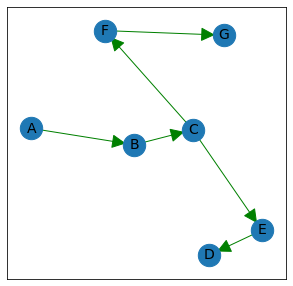

In [5]:
#Make a plot
plt.figure(figsize=(5,5))
pos=nx.spring_layout(G)
nx.draw_networkx_nodes(G, pos, node_size=500)
nx.draw_networkx_edges(G,pos,width=1,style='dashed',edge_color='g',
                      arrowsize=30) #df.prox.values)
nx.draw_networkx_labels(G, pos, font_size=14, font_family="sans-serif",font_color='black')
plt.show()

## Weighted Networks with Edge Attributes added

In [6]:
G=nx.Graph()
G.add_edge('A','B',weight=5,relation='friend')
G.add_edge('B','C',weight=10,relation='friend')
G.add_edge('C','E',weight=15,relation='neighbor')
G.add_edge('E','D',weight=5,relation='coworker')
G.add_edge('C','F',weight=7,relation='friend')
G.add_edge('F','G',weight=9,relation='family')


No handles with labels found to put in legend.


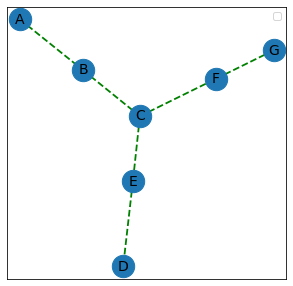

In [7]:
#Make a plot
plt.figure(figsize=(5,5))
pos=nx.spring_layout(G)
nx.draw_networkx_nodes(G, pos, node_size=500)
nx.draw_networkx_edges(G,pos,width=1.8,style='dashed',edge_color='g') #df.prox.values)
nx.draw_networkx_labels(G, pos, font_size=14, font_family="sans-serif",font_color='black')
plt.legend()
plt.show()

# Creating a Bipartite Graph

In [8]:
#We create bipartite graph same as regular undirected graph.
B=nx.Graph()
a=["A","B","C","D","E"]
B.add_nodes_from(["A","B","C","D","E"],bipartite=0)
B.add_nodes_from(["1","2","3","4"],bipartite=1)
B.add_edges_from([('A','1'),('C','1'),('D','2'),('B','3'),
                  ('E','1'),('B','2'),('A','3'),('C','4')])


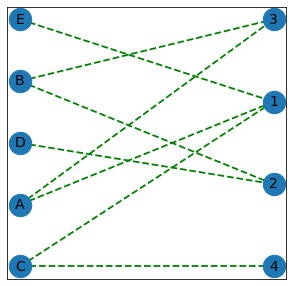

In [9]:
#Make a plot
plt.figure(figsize=(5,5))
pos=nx.bipartite_layout(B,a)
nx.draw_networkx_nodes(B, pos, node_size=500)
nx.draw_networkx_edges(B,pos,width=1.8,style='dashed',edge_color='g') #df.prox.values)
nx.draw_networkx_labels(B, pos, font_size=14, font_family="sans-serif",font_color='black')
plt.show()

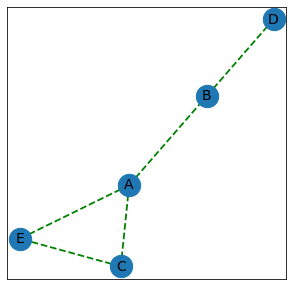

In [10]:
#Create Projected Graph
P=nx.bipartite.projected_graph(B,a)
plt.figure(figsize=(5,5))
pos=nx.spring_layout(P)
nx.draw_networkx_nodes(P, pos, node_size=500)
nx.draw_networkx_edges(P,pos,width=1.8,style='dashed',edge_color='g') #df.prox.values)
nx.draw_networkx_labels(P, pos, font_size=14, font_family="sans-serif",font_color='black')
plt.show()

# The Karate Club

In [11]:
G = nx.karate_club_graph()

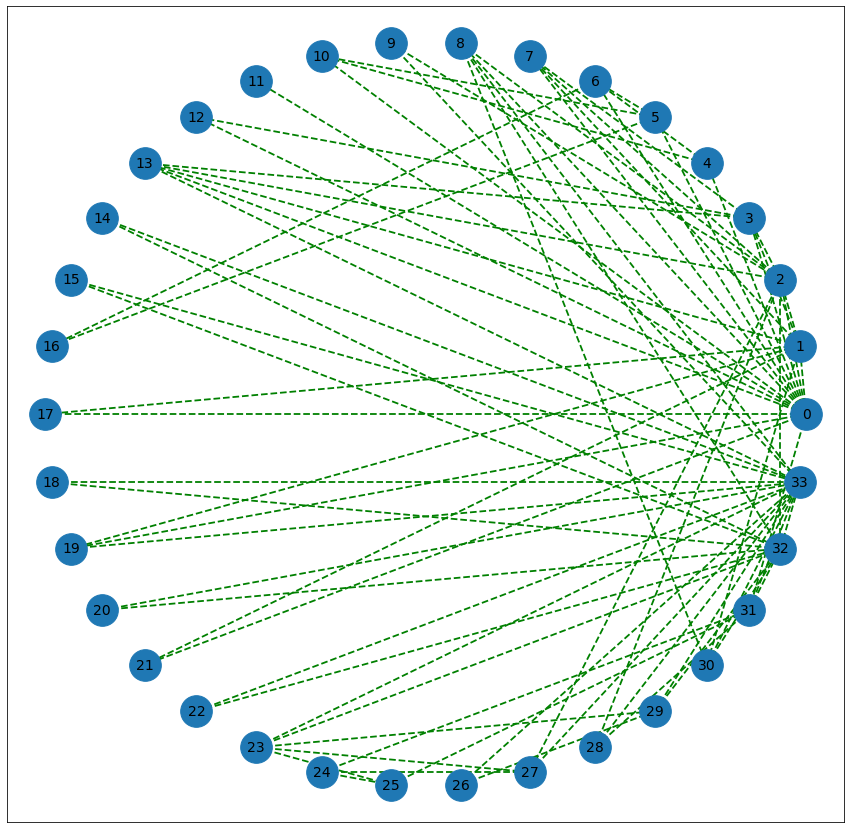

In [12]:
plt.figure(figsize=(15,15))
pos=nx.circular_layout(G)
nx.draw_networkx_nodes(G, pos, node_size=1000)
nx.draw_networkx_edges(G,pos,width=1.8,style='dashed',edge_color='g') #df.prox.values)
nx.draw_networkx_labels(G, pos, font_size=14, font_family="sans-serif",font_color='black')
plt.show()

In [ ]:
# Degree Centrality: Assumes important nodes have many connections
centrality=nx.degree_centrality(G)
print ('Max. Degree Centrality:',
       max(centrality),round(max(centrality.values()),4))
print ('Min. Degree Centrality:',
       min(centrality),round(min(centrality.values()),4))

In [ ]:
#Closeness Centrality: Important nodes are close to other nodes
closeCent=nx.closeness_centrality(G)
sort_CC=list(sorted((value,key) for (key,value) in closeCent.items()))
print ("Max. Closeness Centrality:",sort_CC[-1],
       "\nMin. Closeness Centrality:",sort_CC[0])

In [ ]:
#Betweenness Centrality: important nodes connect other nodes
btwnCent=nx.betweenness_centrality(G)
sort_bC=list(sorted((value,key) for (key,value) in btwnCent.items()))
print ("Max. Betweenness Centrality:",sort_bC[-1],
       "\nMin. Betweenness Centrality:",sort_bC[0])

In [ ]:
btwnCent_edge=nx.edge_betweenness_centrality(G,normalized=True)
sort_bCe=list(sorted((value,key) for (key,value) in btwnCent_edge.items()))
print ("Max. Edge Betweenness Centrality:",sort_bCe[-1],
       "\nMin. Edge Betweenness Centrality:",sort_bCe[0])

In [ ]:
#Plot of Degree distributions
degrees=G.degree()
degree_values=[v for k,v in degrees]
histogram=[list(degree_values).count(i) for i in degree_values]
plt.bar(degree_values,histogram);

In [ ]:
#PageRank 
pr=nx.pagerank(G,alpha=0.85)
dict(sorted(pr.items(), key=lambda item: item[1]))

## Distance Measures

In [ ]:
#Average Distance between every pair or nodes
print('Average Distance between every pair or nodes:',
      nx.average_shortest_path_length(G))
print('Diameter of the graph:',nx.diameter(G))

In [ ]:
#Eccentricity of a node n is the largest distance between n and all other nodes
#Radius of a graph is the minimum eccentricity
print('Radius:',nx.radius(G))
#Periphery of a graph is the set of nodes with eccentricty=diameter.
print('Periphery:',nx.periphery(G))
#Center of a graph is set of nodes with eccentricity = radius
print("Center:",nx.center(G))

In [ ]:
print ('Is the graph connected?',nx.is_connected(G))

## Network Robustness

In [ ]:
#Smallest number of nodes taht can be removed to disconnect it
print('Node Connectivity:',nx.node_connectivity(G))
#Which Nodes?
print('Which Nodes to disconnect?',nx.minimum_node_cut(G))

In [ ]:
print('Edge Connectivity:',nx.edge_connectivity(G))
print('Which Edges to disconnect?\n',nx.minimum_edge_cut(G))

In [ ]:
# Stop someone from connecting to another node
print(nx.edge_connectivity(G,0,22))
print('Which Edges to disconnect?\n',nx.minimum_edge_cut(G,0,22))

In [ ]:
#Find all paths between two nodes
sorted(nx.all_simple_paths(G,0,18))

## Link Prediction

In [ ]:
#Find common neighbors between any two nodes
#nx.non_edges(G2) returns the non-existent edges in the graph
print('Print first 5 pairs of non-edges:\n',list(nx.non_edges(G))[:5])
#nx.common_neighbors(G,u,v) returns the common neighbors of two nodes in a graph.
common_neigh=[(e[0],e[1],len(list(nx.common_neighbors(G,e[0],e[1])))) for e in nx.non_edges(G)]
cn=pd.DataFrame(common_neigh,columns=['Node_1','Node_2','cmn_nebrs'])
cn=cn.sort_values('cmn_nebrs',ascending=False)
cn[cn.cmn_nebrs >=4] # Print nodes pairs with 4 or more common neigbors

## Network Clustering

In [ ]:
#Number of Triangles formed by all nodes
print ('Total # of Triangles:',
       nx.triangles(G))
# To calculate triangle formed by single or list of nodes
print ("Triangles formed by given list:",
       nx.triangles(G,[4,12]) )

In [ ]:
# Calculate Transitivity of Graph
# C = number of closed path of length 2/ number of paths of length 2
nx.transitivity(G)

In [ ]:
#Ci =  Number of pairs of neighbors of i that are connected/(number of Pairs of neighbors of i)
nx.clustering(G)

In [ ]:
nx.average_clustering(G)

In [ ]:
#Square_clustering ( Forming a square)
#nx.square_clustering(G2) # Shows for entire graph
nx.square_clustering(G,[5])

In [ ]:
#Calculate Local Clustering Coeffecient
nx.clustering(G,1),nx.clustering(G,32)

In [ ]:
#Global clustering Coeffecient
nx.average_clustering(G)

In [ ]:
#Random Network
#Scale Free Network
#Small World Network


# Generating Graphs

## G(n,p) Random Graph

In [ ]:
G=nx.fast_gnp_random_graph(n=100,p=0.05, seed=42,directed=False)

In [ ]:
plt.figure(figsize=(15,15))
pos=nx.spring_layout(G)
nx.draw_networkx_nodes(G, pos, node_size=1000)
nx.draw_networkx_edges(G,pos,width=1.8,style='dashed',edge_color='g') #df.prox.values)
nx.draw_networkx_labels(G, pos, font_size=14, font_family="sans-serif",font_color='black')
plt.show()

In [ ]:
degrees=G.degree()
degree_values=[v for k,v in degrees]
histogram=[list(degree_values).count(i) for i in degree_values]
plt.bar(degree_values,histogram);

## Configuration Model

In [ ]:
sequence = nx.random_powerlaw_tree_sequence(100,gamma=3,seed=12, tries=5000)
G = nx.configuration_model(sequence)

In [ ]:
plt.figure(figsize=(15,15))
pos=nx.kamada_kawai_layout(G)
nx.draw_networkx_nodes(G, pos, node_size=1000)
nx.draw_networkx_edges(G,pos,width=1.8,style='dashed',edge_color='g') #df.prox.values)
nx.draw_networkx_labels(G, pos, font_size=14, font_family="sans-serif",font_color='black')
plt.show()

In [ ]:
degrees=G.degree()
degree_values=[v for k,v in degrees]
histogram=[list(degree_values).count(i) for i in degree_values]
plt.bar(degree_values,histogram);